In [1]:
import pandas as pd

In [39]:
#SetFit
# real = pd.read_csv('../Ergebnisse/SetFit/sf_prediction_real.csv')
# syn = pd.read_csv('../Ergebnisse/SetFit/sf_prediction_syn3_new.csv')
# llm = pd.read_csv('../Ergebnisse/SetFit/sf_prediction_syn42_new_llm.csv')

zsi = pd.read_csv('../Bert/3try/SynTrainLLMclass.csv')
fs = pd.read_csv('../Ergebnisse/LeoLM/sicherheitMain_FS.csv')
zs = pd.read_csv('../Ergebnisse/LeoLM/sicherheitMain_ZS.csv')

zs.rename({'response': 'zs'}, axis=1, inplace=True)
zsi.rename({'response': 'zsi'}, axis=1, inplace=True)
fs.rename({'response': 'fs'}, axis=1, inplace=True)


merged_df1_2 = pd.merge(zsi, zs, on=['_id', 'Unnamed: 0'], how='right')
data = pd.merge(merged_df1_2, fs, on=['_id', 'Unnamed: 0'], how='inner')

In [59]:
data['fs'] = data['fs'].replace(3, -1)


In [62]:
data['zs'].value_counts()

zs
 0    1518
-1      62
 1      20
Name: count, dtype: int64

In [63]:
real_labels = data['label_y']
zero_shot = data['zs']
zero_shot_with_definition = data['zsi']
few_shot = data['fs']

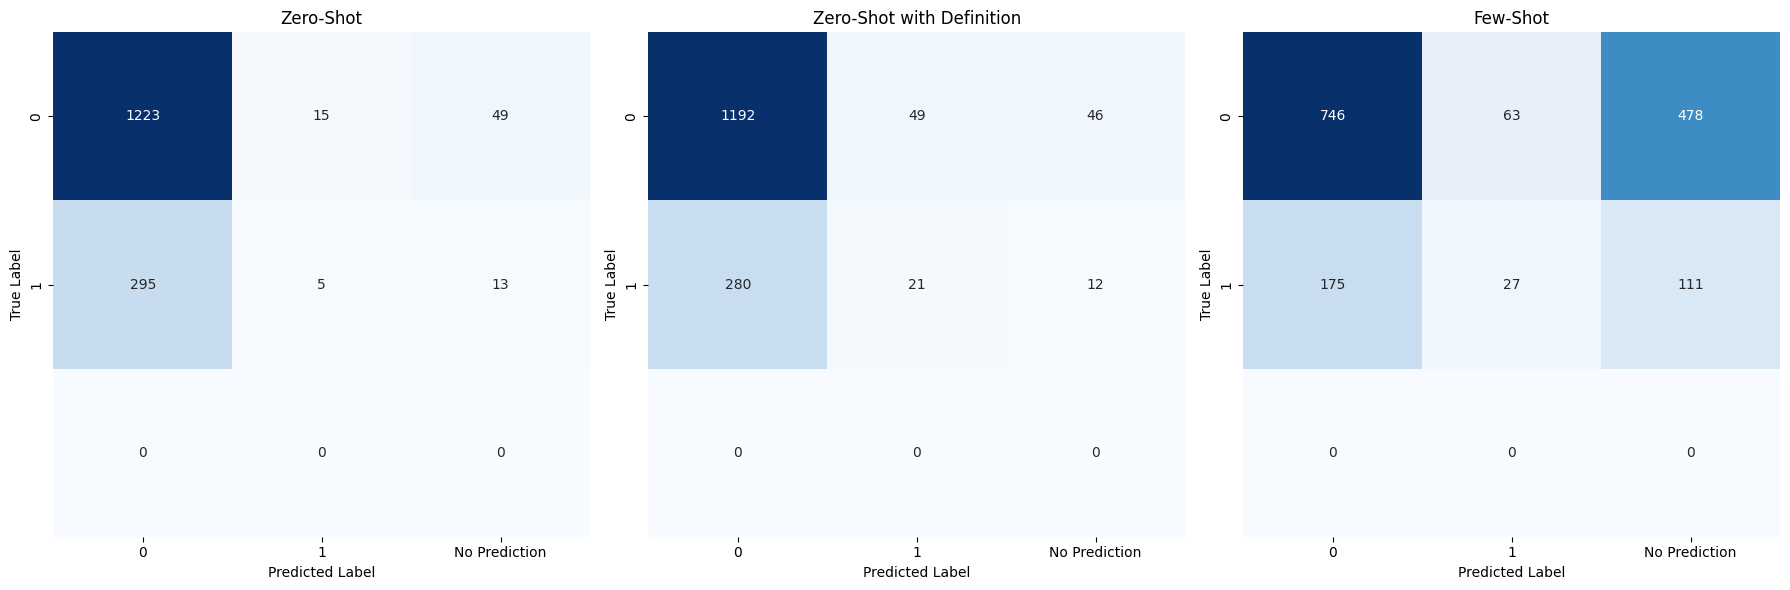

In [64]:
# Generate confusion matrices including the -1 class
cm_zero_shot = confusion_matrix(real_labels, zero_shot, labels=[0, 1, -1])
cm_zero_shot_with_definition = confusion_matrix(real_labels, zero_shot_with_definition, labels=[0, 1, -1])
cm_few_shot = confusion_matrix(real_labels, few_shot, labels=[0, 1, -1])

def plot_multiple_confusion_matrices(cms, titles):
    fig, axes = plt.subplots(1, len(cms), figsize=(18, 6))
    for i, (cm, title) in enumerate(zip(cms, titles)):
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i], xticklabels=[0, 1, "No Prediction"], yticklabels=[0, 1])
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
        axes[i].set_title(title)
    plt.tight_layout()
    plt.show()

plot_multiple_confusion_matrices(
    [cm_zero_shot, cm_zero_shot_with_definition, cm_few_shot],
    ["Zero-Shot", "Zero-Shot with Definition", "Few-Shot"]
)